In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_rows', None)
#d.set_option('display.max_columns', None)

In [46]:
abt_path = '../data/raw/GSEP_List.csv'
df = pd.read_csv(abt_path, sep=',', index_col='sep_index')
df.head()

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,...,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,NaN,2/4/1986 9:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,NaN,2/5/1986 17:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,NaN,NaN,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,NaN,2/6/1986 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,NaN,2/7/1986 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,Taken by 6,NaN,NaN,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,NaN,2/10/1986 21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,S,NaN,Spike,NaN,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0


In [48]:
df.shape

(433, 47)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, gsep_001 to gsep_341
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pp_index              433 non-null    object 
 1   cdaw_sep_id           433 non-null    object 
 2   timestamp             433 non-null    object 
 3   cdaw_start_time       433 non-null    object 
 4   cdaw_max_time         433 non-null    object 
 5   cdaw_evn_max          433 non-null    float64
 6   cme_id                433 non-null    object 
 7   cme_launch_time       433 non-null    object 
 8   cme_1st_app_time      433 non-null    object 
 9   lasco_cme_width       433 non-null    float64
 10  p_cme_width           433 non-null    float64
 11  lasco_linear_speed    433 non-null    float64
 12  p_cme_speed           433 non-null    float64
 13  fl_id                 433 non-null    object 
 14  fl_start_time         433 non-null    object 
 15  fl_peak_time    

In [54]:
#label Encoding for True and False
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['noaa_ar_uncertain'] = label_encoder.fit_transform(df['noaa_ar_uncertain'])
df['fl_goes_class'] = label_encoder.fit_transform(df['fl_goes_class'].astype(str))



In [55]:
numeric_features = df.select_dtypes(exclude=['object', 'bool']).columns.drop('Flag')
df[numeric_features]=df[numeric_features].apply(lambda x: (x - x.min())/(x.max()-x.min()))
df=df.fillna(0)
df

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,...,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,0,2/4/1986 9:25,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,0,2/5/1986 17:50,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,0,2/6/1986 11:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,1.0,S,0,Spike,0,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,0,2/7/1986 13:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,Taken by 6,0,0,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,0,2/10/1986 21:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,Spike,0,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_338,0,cdaw_sep_149,7/14/2017 9:00,7/14/2017 4:40,7/14/2017 23:20,0.000662,lasco_28753,7/14/2017 1:02,7/14/2017 1:25,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,7/13/2017 21:00,7/16/2017 19:40,1
gsep_338_1,0,0,7/25/2017 3:00,0,0,0.000000,0,0,7/23/2017 4:36,0.239316,...,0.000000,0.0,P,0,0,0,0,7/24/2017 15:00,7/26/2017 4:00,0
gsep_339,0,cdaw_sep_150,9/5/2017 0:40,9/4/2017 22:30,9/5/2017 19:20,0.006593,lasco_28869,9/4/2017 20:13,9/4/2017 20:36,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,9/4/2017 12:40,9/6/2017 12:30,1


In [56]:
df=df.replace('NaN', '')
df.to_csv("../Data/processed/GSEP_List_processed_1.csv")

In [57]:
df

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,...,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,0,2/4/1986 9:25,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,0,2/5/1986 17:50,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,0,2/6/1986 11:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,1.0,S,0,Spike,0,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,0,2/7/1986 13:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,Taken by 6,0,0,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,0,2/10/1986 21:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,Spike,0,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_338,0,cdaw_sep_149,7/14/2017 9:00,7/14/2017 4:40,7/14/2017 23:20,0.000662,lasco_28753,7/14/2017 1:02,7/14/2017 1:25,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,7/13/2017 21:00,7/16/2017 19:40,1
gsep_338_1,0,0,7/25/2017 3:00,0,0,0.000000,0,0,7/23/2017 4:36,0.239316,...,0.000000,0.0,P,0,0,0,0,7/24/2017 15:00,7/26/2017 4:00,0
gsep_339,0,cdaw_sep_150,9/5/2017 0:40,9/4/2017 22:30,9/5/2017 19:20,0.006593,lasco_28869,9/4/2017 20:13,9/4/2017 20:36,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,9/4/2017 12:40,9/6/2017 12:30,1


In [58]:
numeric_features

Index(['cdaw_evn_max', 'lasco_cme_width', 'p_cme_width', 'lasco_linear_speed',
       'p_cme_speed', 'fl_rise_time', 'fl_lon', 'fl_lat', 'fl_goes_class',
       'noaa_ar', 'noaa_ar_uncertain', 'harpnum', 'noaa_pf10MeV',
       'ppf_gt10MeV', 'ppf_gt30MeV', 'ppf_gt60MeV', 'ppf_gt100MeV',
       'fluence_gt10MeV', 'fluence_gt30MeV', 'fluence_gt60MeV',
       'fluence_gt100MeV', 'gsep_pf_gt10MeV', 'gsep_fluence_gt10MeV',
       'start_fr', 'noaa-sep_flag'],
      dtype='object')

In [59]:
df_sep=df[numeric_features]

In [60]:
df_sep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, gsep_001 to gsep_341
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cdaw_evn_max          433 non-null    float64
 1   lasco_cme_width       433 non-null    float64
 2   p_cme_width           433 non-null    float64
 3   lasco_linear_speed    433 non-null    float64
 4   p_cme_speed           433 non-null    float64
 5   fl_rise_time          433 non-null    float64
 6   fl_lon                433 non-null    float64
 7   fl_lat                433 non-null    float64
 8   fl_goes_class         433 non-null    float64
 9   noaa_ar               433 non-null    float64
 10  noaa_ar_uncertain     433 non-null    float64
 11  harpnum               433 non-null    float64
 12  noaa_pf10MeV          433 non-null    float64
 13  ppf_gt10MeV           433 non-null    float64
 14  ppf_gt30MeV           433 non-null    float64
 15  ppf_gt60MeV     

# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config

# Set the display configuration for concise output
set_config(print_changed_only=False)

dt_clf = DecisionTreeClassifier(max_depth = 4, criterion='entropy', random_state = 0, splitter='best')

Data splitting 

In [62]:
from sklearn.model_selection import train_test_split
X1 = df_sep
Y1 = df['Flag']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.33, random_state = 0)

Training the model

In [63]:
dt_clf.fit(X1_train, Y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=0, splitter='best')

Test the model on data

In [64]:
y1_pred = dt_clf.predict(X1_test)
y1_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

Evaluate the model

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(Y1_test, y1_pred)
accuracy

0.9790209790209791

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(Y1_test, y1_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y1_test, y1_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.96      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
[[58  0]
 [ 3 82]]


In [67]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, gsep_001 to gsep_341
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cdaw_evn_max          433 non-null    float64
 1   lasco_cme_width       433 non-null    float64
 2   p_cme_width           433 non-null    float64
 3   lasco_linear_speed    433 non-null    float64
 4   p_cme_speed           433 non-null    float64
 5   fl_rise_time          433 non-null    float64
 6   fl_lon                433 non-null    float64
 7   fl_lat                433 non-null    float64
 8   fl_goes_class         433 non-null    float64
 9   noaa_ar               433 non-null    float64
 10  noaa_ar_uncertain     433 non-null    float64
 11  harpnum               433 non-null    float64
 12  noaa_pf10MeV          433 non-null    float64
 13  ppf_gt10MeV           433 non-null    float64
 14  ppf_gt30MeV           433 non-null    float64
 15  ppf_gt60MeV     

Visualizing the tree

Index(['cdaw_evn_max', 'lasco_cme_width', 'p_cme_width', 'lasco_linear_speed',
       'p_cme_speed', 'fl_rise_time', 'fl_lon', 'fl_lat', 'fl_goes_class',
       'noaa_ar', 'noaa_ar_uncertain', 'harpnum', 'noaa_pf10MeV',
       'ppf_gt10MeV', 'ppf_gt30MeV', 'ppf_gt60MeV', 'ppf_gt100MeV',
       'fluence_gt10MeV', 'fluence_gt30MeV', 'fluence_gt60MeV',
       'fluence_gt100MeV', 'gsep_pf_gt10MeV', 'gsep_fluence_gt10MeV',
       'start_fr', 'noaa-sep_flag'],
      dtype='object')
['0', '1']


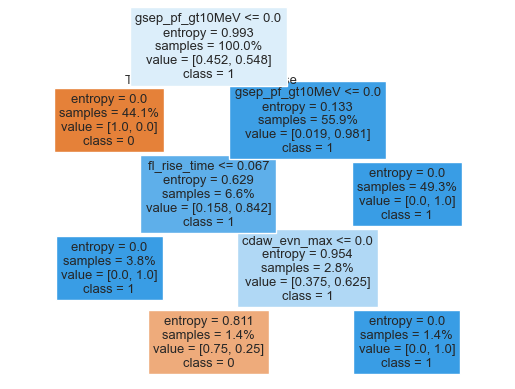

In [68]:
from sklearn import tree
desc_features = X1.columns
print(desc_features)
target_names = [str(cls) for cls in np.unique(Y1)]
print(target_names)

ax=tree.plot_tree(dt_clf, feature_names=desc_features, class_names=target_names, filled=True, proportion=True)

# Decision Tree Regressor

In [69]:
df

,pp_index,cdaw_sep_id,timestamp,cdaw_start_time,cdaw_max_time,cdaw_evn_max,cme_id,cme_launch_time,cme_1st_app_time,lasco_cme_width,...,start_fr,noaa-sep_flag,Inst_category,Comments,Notes,Fe_e_p_shock_notes,gsep_notes,slice_start,slice_end,Flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,psep_012,0,2/4/1986 9:25,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/3/1986 21:25,2/4/1986 17:45,0
gsep_002,psep_013,0,2/5/1986 17:50,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,0,0,AR from LMSAL-HEK,2/5/1986 5:50,2/6/1986 8:35,0
gsep_003,psep_014,0,2/6/1986 11:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,1.0,S,0,Spike,0,AR from LMSAL-HEK,2/5/1986 23:00,2/7/1986 13:25,1
gsep_004,psep_015,0,2/7/1986 13:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,Taken by 6,0,0,AR from LMSAL-HEK,2/7/1986 1:00,2/8/1986 22:20,1
gsep_005,psep_016,0,2/10/1986 21:00,0,0,0.000000,0,0,0,0.000000,...,0.000000,0.0,S,0,Spike,0,AR from LMSAL-HEK,2/10/1986 9:00,2/12/1986 6:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_338,0,cdaw_sep_149,7/14/2017 9:00,7/14/2017 4:40,7/14/2017 23:20,0.000662,lasco_28753,7/14/2017 1:02,7/14/2017 1:25,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,7/13/2017 21:00,7/16/2017 19:40,1
gsep_338_1,0,0,7/25/2017 3:00,0,0,0.000000,0,0,7/23/2017 4:36,0.239316,...,0.000000,0.0,P,0,0,0,0,7/24/2017 15:00,7/26/2017 4:00,0
gsep_339,0,cdaw_sep_150,9/5/2017 0:40,9/4/2017 22:30,9/5/2017 19:20,0.006593,lasco_28869,9/4/2017 20:13,9/4/2017 20:36,1.000000,...,0.866667,1.0,P,0,0,0,Type II Radio burst From CDAW list,9/4/2017 12:40,9/6/2017 12:30,1


In [70]:
all_features=df.drop(columns=['Flag']).columns.tolist()

Data splitting and training the model

In [71]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5,random_state=0)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(df[numeric_features], df['Flag'],test_size=0.33, random_state=0)

dt_reg.fit(X2_train, Y2_train)
y2_pred = dt_reg.predict(X2_test)
y2_pred

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1.])

Model Evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(Y2_test, y2_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y2_test, y2_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.96      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
[[58  0]
 [ 3 82]]


In [73]:
# Check the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y2_test, y2_pred)

0.02097902097902098

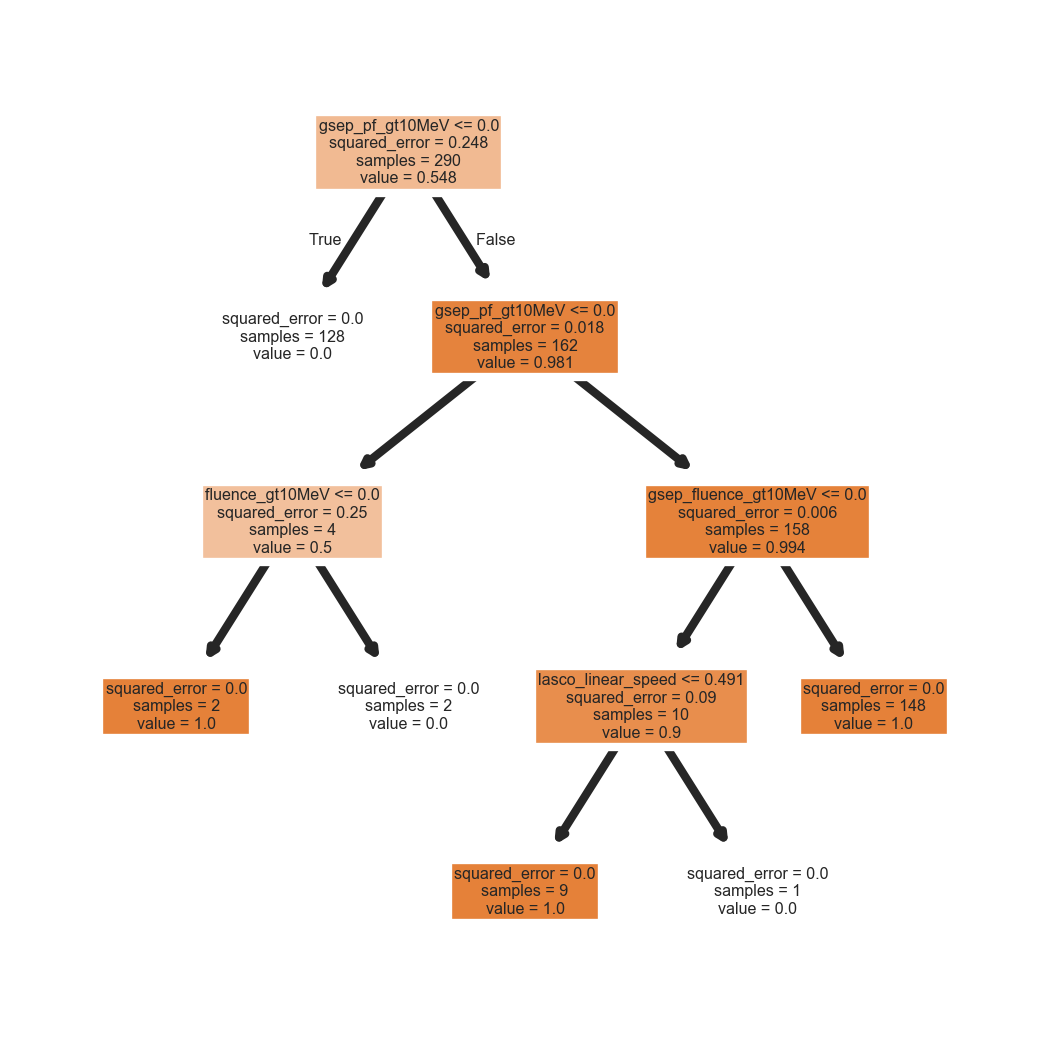

In [74]:
fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize=(2,2), dpi=600)
ax=tree.plot_tree(dt_reg, feature_names=numeric_features, filled=True)

# Ensemble Models

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, n_estimators=8, random_state=0)
rf_clf.fit(X2_train, Y2_train)
y2_pred = rf_clf.predict(X2_test)

In [76]:
accuracy = accuracy_score(Y2_test, y2_pred)
accuracy

0.965034965034965

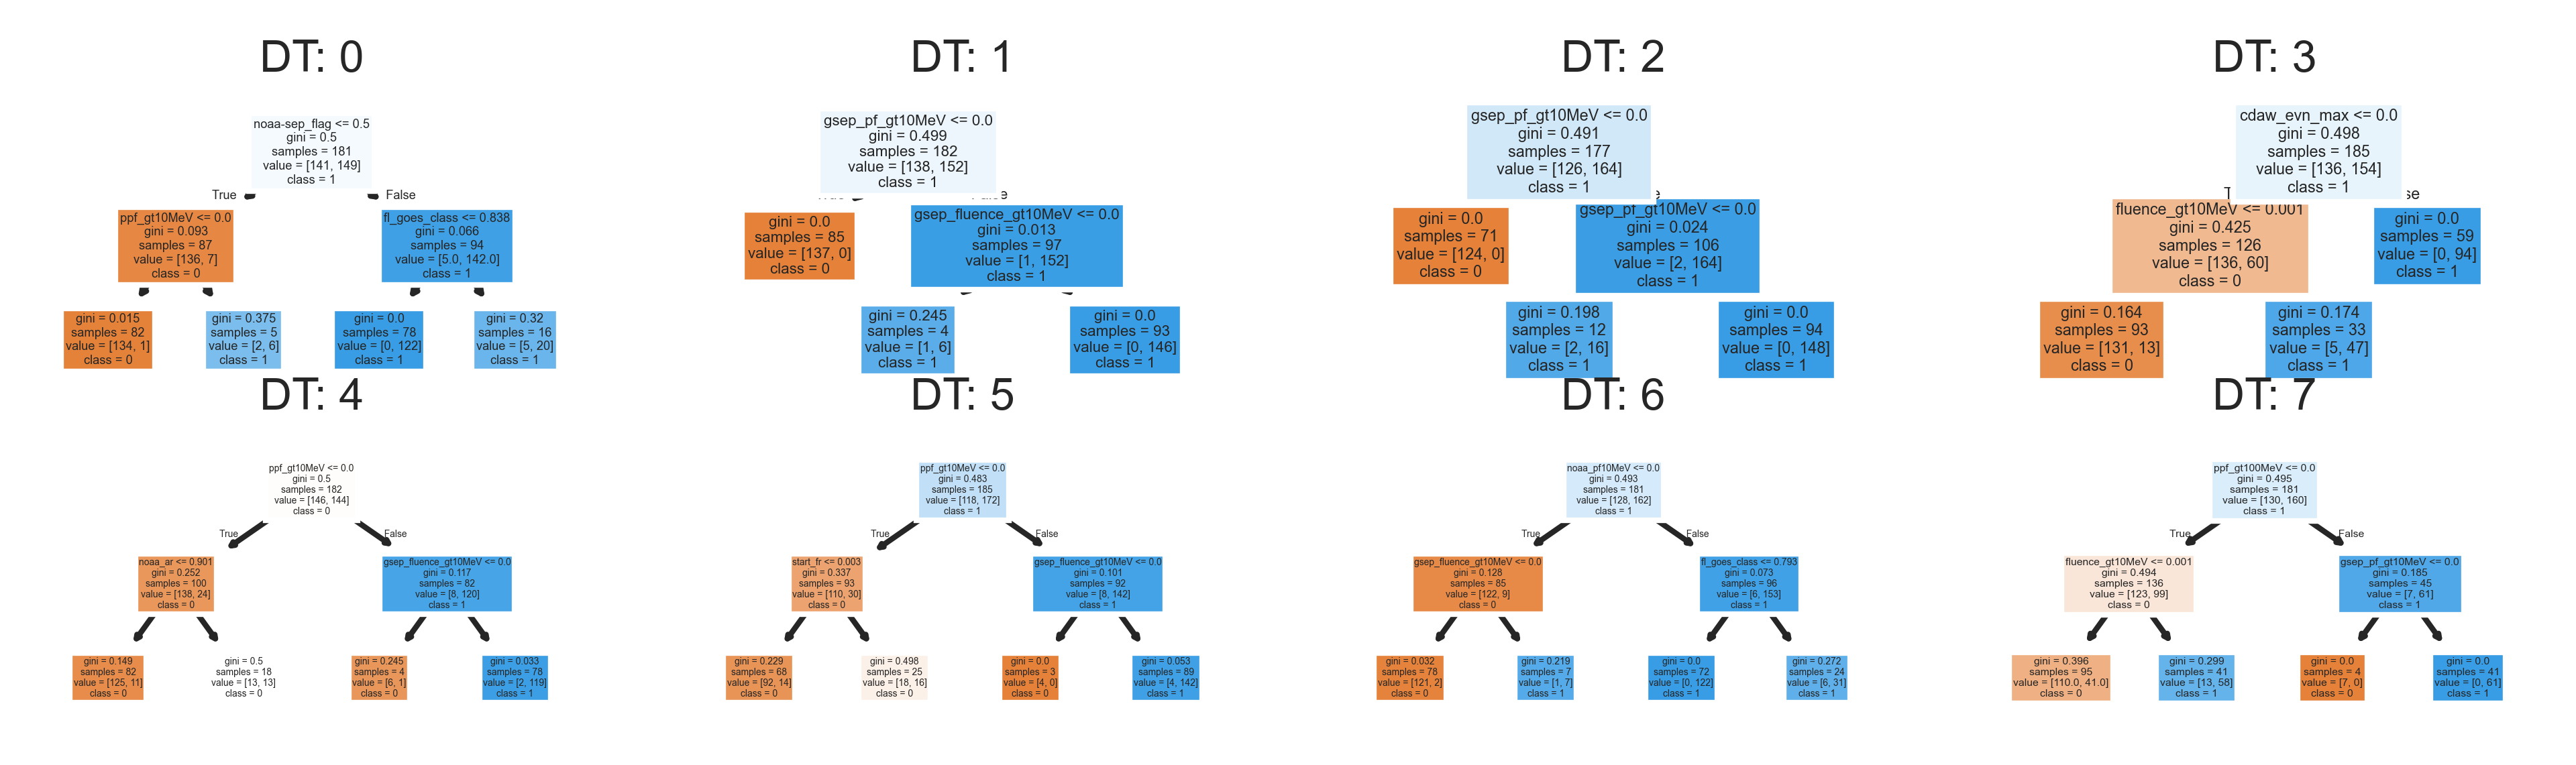

In [77]:
fig, axes = plt.subplots(nrows = 2,ncols = 4,figsize = (8,2), dpi=600)
axes = axes.ravel()
for i in range(8):
    tree.plot_tree(rf_clf.estimators_[i],
                   feature_names = numeric_features, 
                   class_names=df['Flag'].unique().astype(str),
                   filled = True, 
                   ax = axes[i])
    axes[i].set_title('DT: ' + str(i), fontsize = 8)

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf.fit(X2_train, Y2_train)
y2_pred = gb_clf.predict(X2_test)

print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))

classification_report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.98      0.99        85

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

confusion_matrix:
 [[58  0]
 [ 2 83]]
roc_auc_score: 0.9882352941176471


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_clf.fit(X2_train, Y2_train)
y2_pred = ab_clf.predict(X2_test)
print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))



classification_report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.95      0.98        85

    accuracy                           0.97       143
   macro avg       0.97      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

confusion_matrix:
 [[58  0]
 [ 4 81]]
roc_auc_score: 0.9764705882352941


C:\Users\Pranjal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [86]:
from sklearn.ensemble import BaggingClassifier
bg_clf = BaggingClassifier(n_estimators=10, random_state=0)
bg_clf.fit(X2_train, Y2_train)
y2_pred = bg_clf.predict(X2_test)
print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))



classification_report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.96      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

confusion_matrix:
 [[58  0]
 [ 3 82]]
roc_auc_score: 0.9823529411764707


In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)
ev_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf), ('svm', svm_clf)], voting='soft')
ev_clf.fit(X2_train, Y2_train)
y2_pred = ev_clf.predict(X2_test)
print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))



classification_report:               precision    recall  f1-score   support

           0       0.85      0.97      0.90        58
           1       0.97      0.88      0.93        85

    accuracy                           0.92       143
   macro avg       0.91      0.92      0.91       143
weighted avg       0.92      0.92      0.92       143

confusion_matrix:
 [[56  2]
 [10 75]]
roc_auc_score: 0.9239350912778904


In [88]:
from sklearn.ensemble import StackingClassifier
st_clf = StackingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf), ('svm', svm_clf)],final_estimator=LogisticRegression())
st_clf.fit(X2_train, Y2_train)
y2_pred = st_clf.predict(X2_test)
print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))




classification_report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.99      0.99        85

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

confusion_matrix:
 [[58  0]
 [ 1 84]]
roc_auc_score: 0.9941176470588236


In [89]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
et_clf.fit(X2_train, Y2_train)
Y2_pred = et_clf.predict(X2_test)
print("classification_report:",classification_report(Y2_test, y2_pred))
print("confusion_matrix:\n",confusion_matrix(Y2_test, y2_pred))
print("roc_auc_score:",roc_auc_score(Y2_test, y2_pred))

classification_report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.99      0.94      0.96        85

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

confusion_matrix:
 [[57  1]
 [ 5 80]]
roc_auc_score: 0.9619675456389452


# Probability-based Learning

array([[<Axes: title={'center': 'cdaw_evn_max'}>,
        <Axes: title={'center': 'lasco_cme_width'}>,
        <Axes: title={'center': 'p_cme_width'}>,
        <Axes: title={'center': 'lasco_linear_speed'}>,
        <Axes: title={'center': 'p_cme_speed'}>],
       [<Axes: title={'center': 'fl_rise_time'}>,
        <Axes: title={'center': 'fl_lon'}>,
        <Axes: title={'center': 'fl_lat'}>,
        <Axes: title={'center': 'fl_goes_class'}>,
        <Axes: title={'center': 'noaa_ar'}>],
       [<Axes: title={'center': 'noaa_ar_uncertain'}>,
        <Axes: title={'center': 'harpnum'}>,
        <Axes: title={'center': 'noaa_pf10MeV'}>,
        <Axes: title={'center': 'ppf_gt10MeV'}>,
        <Axes: title={'center': 'ppf_gt30MeV'}>],
       [<Axes: title={'center': 'ppf_gt60MeV'}>,
        <Axes: title={'center': 'ppf_gt100MeV'}>,
        <Axes: title={'center': 'fluence_gt10MeV'}>,
        <Axes: title={'center': 'fluence_gt30MeV'}>,
        <Axes: title={'center': 'fluence_gt60MeV'}>],

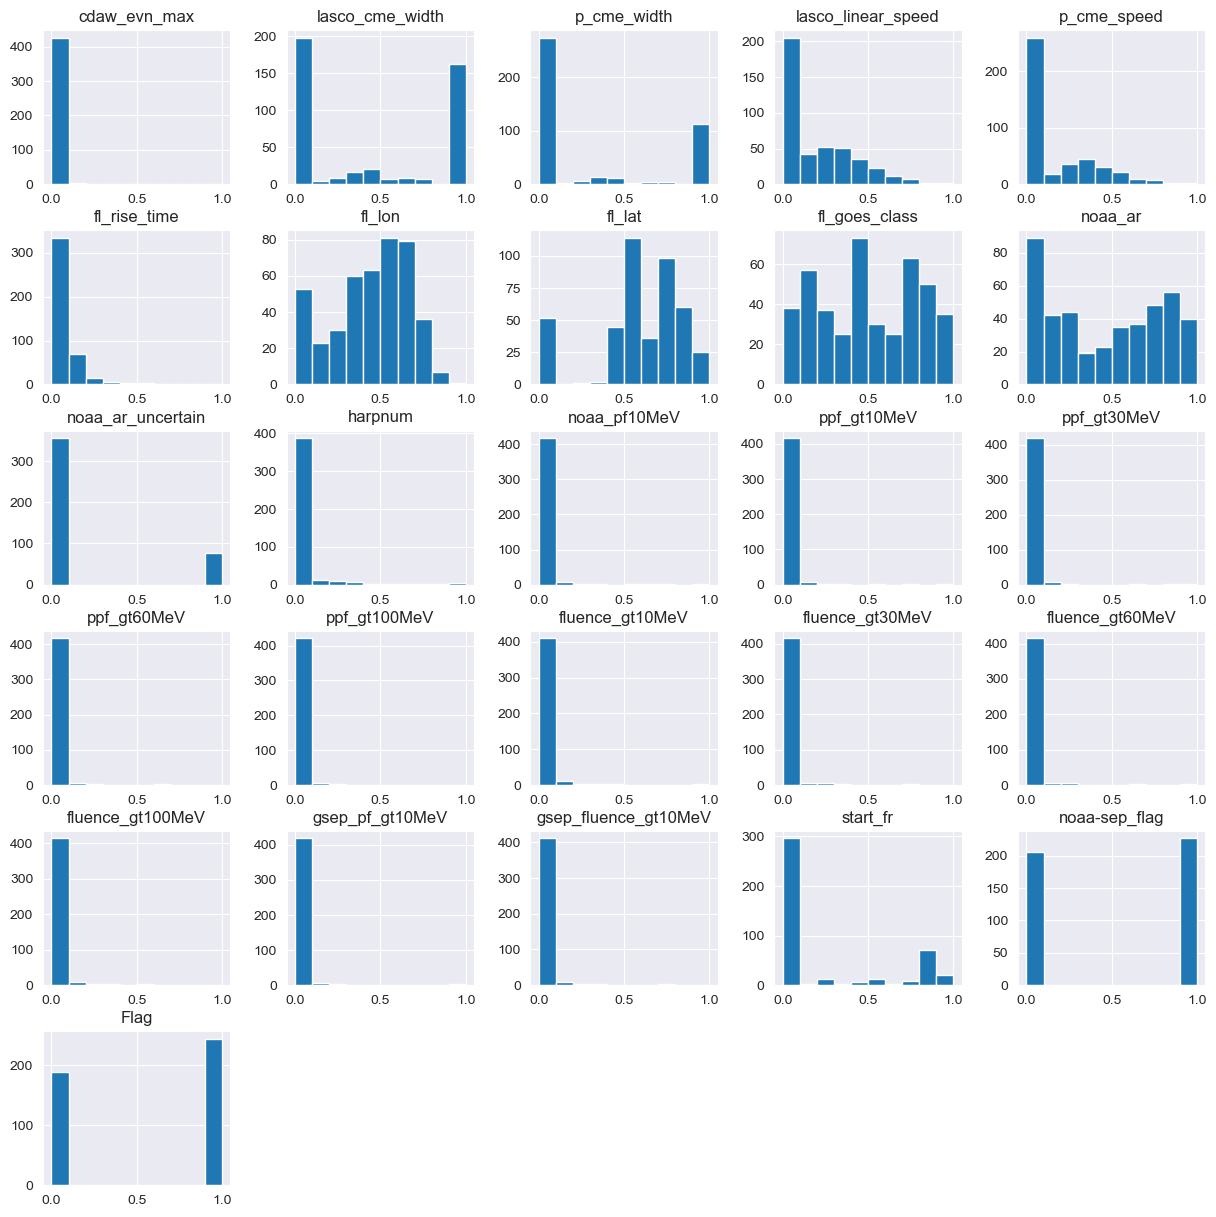

In [90]:
df.hist(figsize=(15, 15))

In [35]:
# proton_flux_features=['noaa_pf10MeV','ppf_gt10MeV','ppf_gt30MeV','ppf_gt60MeV','ppf_gt100MeV','fluence_gt10MeV','fluence_gt30MeV','fluence_gt60MeV','fluence_gt100MeV','gsep_pf_gt10MeV','gsep_fluence_gt10MeV']
# pd.plotting.scatter_matrix(df[proton_flux_features], figsize=(20, 20))
# plt.show()

In [36]:
from sklearn.naive_bayes import GaussianNB

#Setup X and y data

X3 = df[numeric_features]

Y3 = df['Flag']

X3_train,X3_test,Y3_train,Y3_test=train_test_split(X3,Y3,test_size=0.33,random_state=0)

#Fit model
_nbc = GaussianNB(priors = None)
_nbc.fit(X3_train,Y3_train)

y3_pred = _nbc.predict(X3_test)
print("NB Accuracy: {0:.2f}".format( accuracy_score(Y3_test,y3_pred) ))

NB Accuracy: 0.90


NB Accuracy: 0.90


C:\Users\Pranjal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


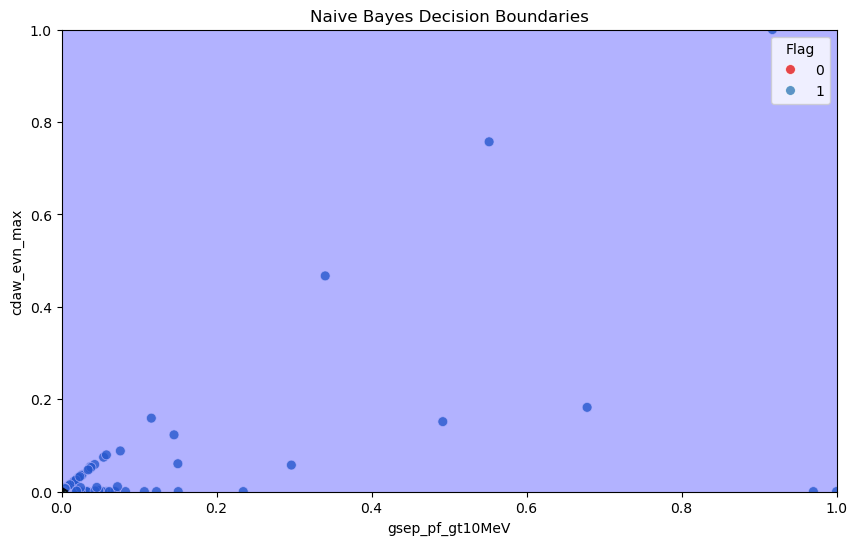

In [38]:
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB

X4 = df[['gsep_pf_gt10MeV','cdaw_evn_max']]
Y4 = df['Flag']

X4_train,X4_test,Y4_train,Y4_test=train_test_split(X4,Y4,test_size=0.33,random_state=0)

#Fit model
_nbc = GaussianNB(priors = None)
_nbc.fit(X4_train,Y4_train)

y4_pred = _nbc.predict(X4_test)
print("NB Accuracy: {0:.2f}".format( accuracy_score(Y4_test,y4_pred) ))

feature1 = 'gsep_pf_gt10MeV'
feature2 = 'cdaw_evn_max'

# Generate grid for decision boundaries
N = 100
x4_min, x4_max = X4[feature1].min(), X4[feature1].max()
y4_min, y4_max = X4[feature2].min(), X4[feature2].max()
X4_grid, Y4_grid = np.meshgrid(np.linspace(x4_min, x4_max, N), np.linspace(y4_min, y4_max, N))

# Predict the class for each point in the grid
grid_predictions = _nbc.predict(np.c_[X4_grid.ravel(), Y4_grid.ravel()]).reshape(X4_grid.shape)

# Plot scatter plot with decision boundaries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=feature1, y=feature2, hue='Flag', palette='Set1', alpha=0.8, s=50)

# Add decision boundary contours
plt.contourf(X4_grid, Y4_grid, grid_predictions, alpha=0.3, levels=2, colors=['blue', 'green'])
plt.contour(X4_grid, Y4_grid, grid_predictions, alpha=0.9, levels=2, colors=['black'])

# Add axis labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Naive Bayes Decision Boundaries')
plt.legend(title='Flag')
plt.show()

# Error-based Learning- Logistic Regression

In [39]:
from sklearn.linear_model import  LogisticRegression
exclude_columns = ['noaa-sep_flag', 'noaa_ar', 'harpnum']
numeric_features_1 = [feature for feature in numeric_features if feature not in exclude_columns ]
# X5 = df[numeric_features]
X5 = df[numeric_features_1]
Y5 = df['Flag']
X5_train,X5_test,Y5_train,Y5_test=train_test_split(X5,Y5,test_size=0.33,random_state=0)
_logreg = LogisticRegression()
_logreg.fit(X5_train, Y5_train)
y5_pred = _logreg.predict(X5_test)

print("Logistic Regression Accuracy: {0:.2f}".format( accuracy_score(Y5_test,y5_pred) ))

Logistic Regression Accuracy: 0.71


In [40]:
coefficients = _logreg.coef_[0]
intercept = _logreg.intercept_
print(f"Coefficients:{coefficients},\nIntercept (bias term):{intercept}")

Coefficients:[ 0.1712165  -0.55335613  0.27916563  0.66296329  2.22458426  0.73378204
  0.57548705  0.76198098  1.58604942  0.15064907  0.52182983  0.49107868
  0.32710288  0.38798803  0.27845635  0.67142687  0.3844358   0.52089882
  0.63377336  0.50952864  0.6669237   0.56638087],
Intercept (bias term):[-1.95450838]


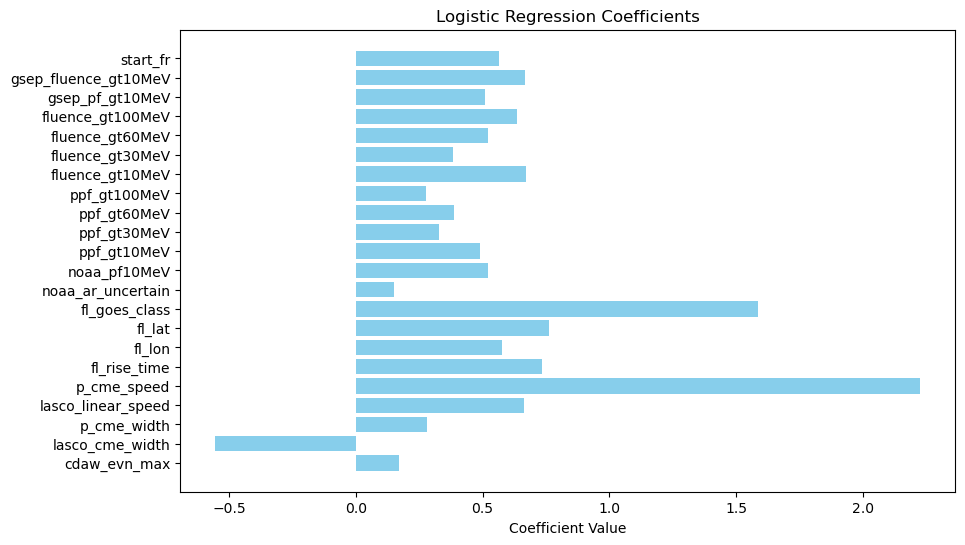

In [41]:
# Create a bar plot for the coefficients

plt.figure(figsize=(10, 6))
plt.barh(numeric_features_1, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

In [42]:
df[numeric_features]

,cdaw_evn_max,lasco_cme_width,p_cme_width,lasco_linear_speed,p_cme_speed,fl_rise_time,fl_lon,fl_lat,fl_goes_class,noaa_ar,...,ppf_gt60MeV,ppf_gt100MeV,fluence_gt10MeV,fluence_gt30MeV,fluence_gt60MeV,fluence_gt100MeV,gsep_pf_gt10MeV,gsep_fluence_gt10MeV,start_fr,noaa-sep_flag
sep_index,,,,,,,,,,,,,,,,,,,,,
gsep_001,0.000000,0.000000,0.0,0.000000,0.000000,0.016026,0.343137,0.637097,0.846591,0.000000,...,0.000000,0.000000,0.000125,0.000158,0.000000,0.000000,0.000176,0.000085,0.000000,0.0
gsep_002,0.000000,0.000000,0.0,0.000000,0.000000,0.051282,0.392157,0.604839,0.409091,0.000000,...,0.000000,0.000000,0.000284,0.000000,0.000000,0.000000,0.000149,0.000184,0.000000,0.0
gsep_003,0.000000,0.000000,0.0,0.000000,0.000000,0.022436,0.418301,0.604839,0.727273,0.000000,...,0.002950,0.002043,0.003909,0.003268,0.005572,0.007139,0.003004,0.004701,0.000000,1.0
gsep_004,0.000000,0.000000,0.0,0.000000,0.000000,0.057692,0.480392,0.572581,0.494318,0.000000,...,0.005381,0.002689,0.007213,0.004401,0.007315,0.010340,0.004498,0.007629,0.000000,0.0
gsep_005,0.000000,0.000000,0.0,0.000000,0.000000,0.073718,0.516340,0.653226,0.272727,0.000249,...,0.000395,0.000229,0.000267,0.000429,0.001262,0.002391,0.000121,0.000163,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gsep_338,0.000662,1.000000,0.0,0.321229,0.309223,0.198718,0.506536,0.612903,0.375000,0.991771,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000506,0.001171,0.866667,1.0
gsep_338_1,0.000000,0.239316,0.0,0.170701,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000039,0.000040,0.000000,0.0
gsep_339,0.006593,1.000000,0.0,0.388889,0.378080,0.016026,0.450980,0.580645,0.511364,0.992768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004824,0.007667,0.866667,1.0


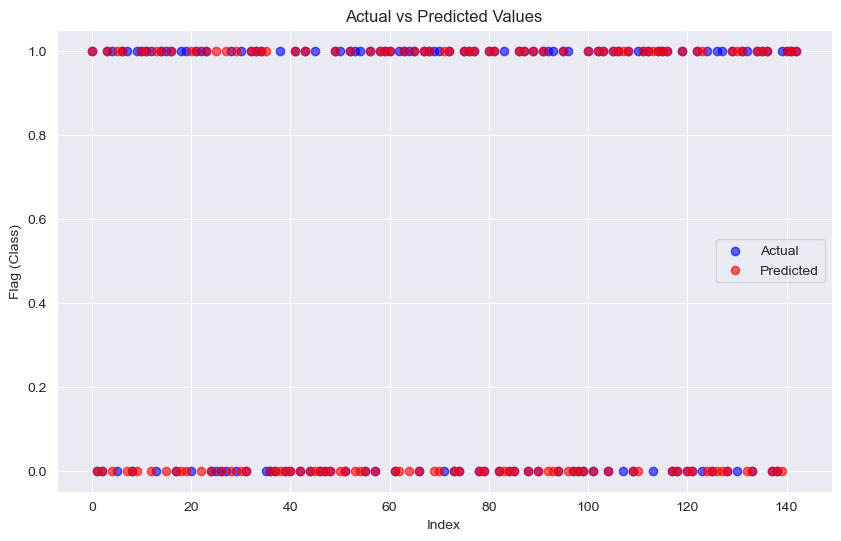

In [43]:
plt.figure(figsize=(10, 6))

# Plot actual values vs predicted values (scatter plot for binary classification)
plt.scatter(range(len(Y5_test)), Y5_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y5_pred)), y5_pred, color='red', label='Predicted', alpha=0.6)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Flag (Class)')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()